In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import SLI_functions as sli

In [3]:
from imp import reload

In [34]:
reload(sli)

<module 'SLI_functions' from '/Users/gkeramidas/Projects/SLIs/SLI_functions.py'>

In [35]:
plt.style.use('ggplot')
plt.rcParams['font.size'] = 30
plt.rcParams['axes.labelsize'] = 30
plt.rcParams['axes.labelweight'] = 'heavy'
plt.rcParams['xtick.labelsize'] = 30
plt.rcParams['ytick.labelsize'] = 30
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['figure.titlesize'] = 30
plt.rcParams['text.usetex']=True

## Reading Data

In [58]:
props_df = pd.read_hdf('dump_20221115T193154.h5', key='propagations')
states_df = pd.read_hdf('dump_20221115T193154.h5', key='states')
targets_df = pd.read_hdf('dump_20221115T193154.h5', key='targets')

## Keeping only debris at starlinks altitude that also are in the 18th's catologue.

In [59]:
filtered_targets_df = targets_df[targets_df[['id','type_id','perigee','apogee']].notnull().all(1)]

In [60]:
deb_at_starlink_altitude_df = filtered_targets_df[(filtered_targets_df['apogee']>=500)&(filtered_targets_df['perigee']<=650)&(filtered_targets_df['type_id']==2)]

In [61]:
len(deb_at_starlink_altitude_df)

6152

## Eigenvalues to propagations

In [62]:
props_edf = sli.add_eig_columns_to_props(props_df)

## Create list of Day objects

In [63]:
D_list = sli.create_day_list(states_df)

In [64]:
list_of_target_ids = list(deb_at_starlink_altitude_df["id"].values)

In [65]:
sli.sort_target_states_in_days(D_list,list_of_target_ids,states_df)

In [66]:
sli.per_target_one_day_props_all_days(D_list, states_df, props_df)

In [67]:
sli.per_target_three_day_props_all_days(D_list, states_df, props_df)

## Calculate percentiles

In [68]:
pre1d110,pre1d125,pre1d150,pre1d175,pre1d195,\
pre2d110,pre2d125,pre2d150,pre2d175,pre2d195,\
pre3d110,pre3d125,pre3d150,pre3d175,pre3d195,\
prd1rms10,prd1rms25,prd1rms50,prd1rms75,prd1rms95= sli.percentiles_1d_prop(D_list)

In [69]:
pre1d310,pre1d325,pre1d350,pre1d375,pre1d395,\
pre2d310,pre2d325,pre2d350,pre2d375,pre2d395,\
pre3d310,pre3d325,pre3d350,pre3d375,pre3d395,\
prd3rms10,prd3rms25,prd3rms50,prd3rms75,prd3rms95 =  sli.percentiles_3d_prop(D_list)

## Plotting

In [70]:
x_major_ticks_labels = sli.xtick_labels(D_list)

In [71]:
xs,x_t = sli.x_plottings(pre1d110)

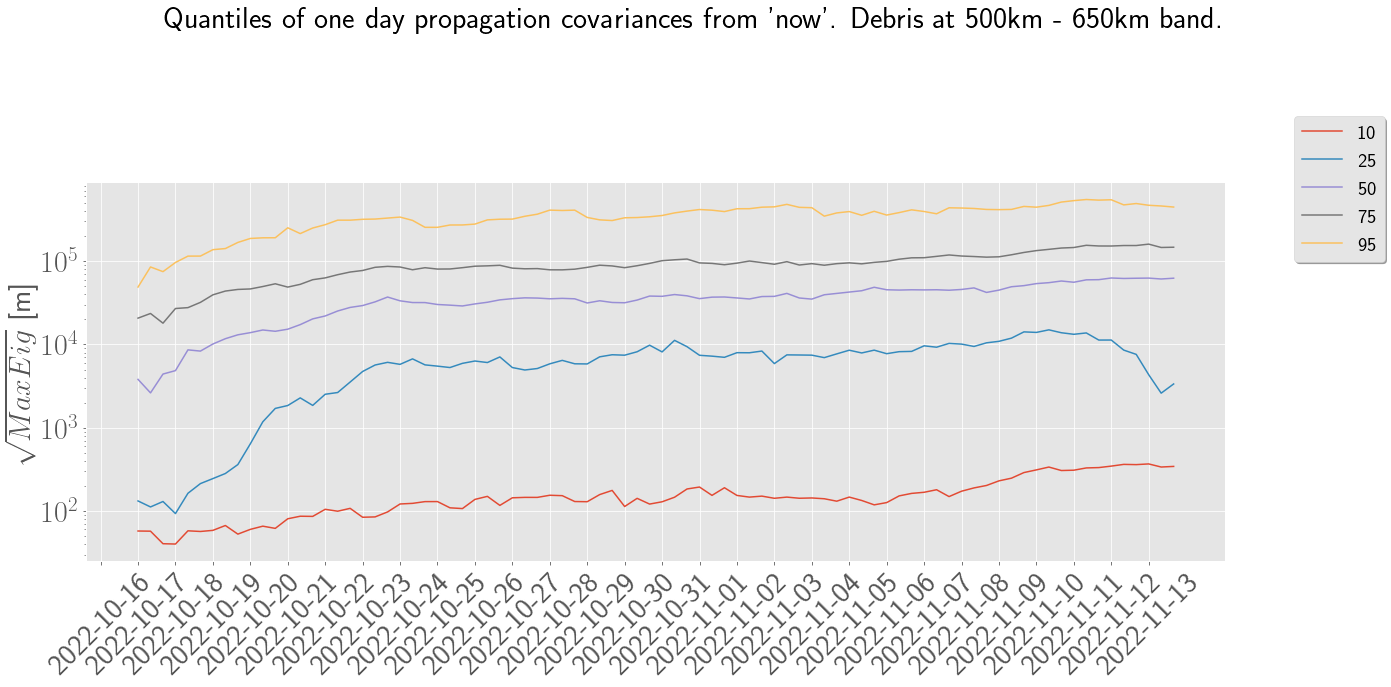

In [72]:
fig,(ax1) = plt.subplots(1,1,figsize=(20,10))

fig.suptitle("Quantiles of one day propagation covariances from 'now'. Debris at 500km - 650km band.")

ax1.plot(xs,np.sqrt(pre1d110),label="10")
ax1.plot(xs,np.sqrt(pre1d125),label="25")
ax1.plot(xs,np.sqrt(pre1d150),label="50")
ax1.plot(xs,np.sqrt(pre1d175),label="75")
ax1.plot(xs,np.sqrt(pre1d195),label="95")
ax1.set_yscale('log')
ax1.set_ylabel(r'$\sqrt{Max Eig}$ [m]')

ax1.xaxis.set_ticks(x_t[0:-1:3])
ax1.xaxis.set_ticklabels(x_major_ticks_labels)
for tick in ax1.get_xticklabels():
    tick.set_rotation(45)
ax1.legend(loc='upper center', bbox_to_anchor=(1.1, 1.2),
          fancybox=True, shadow=True,prop={'size': 20})

plt.tight_layout()
plt.show()

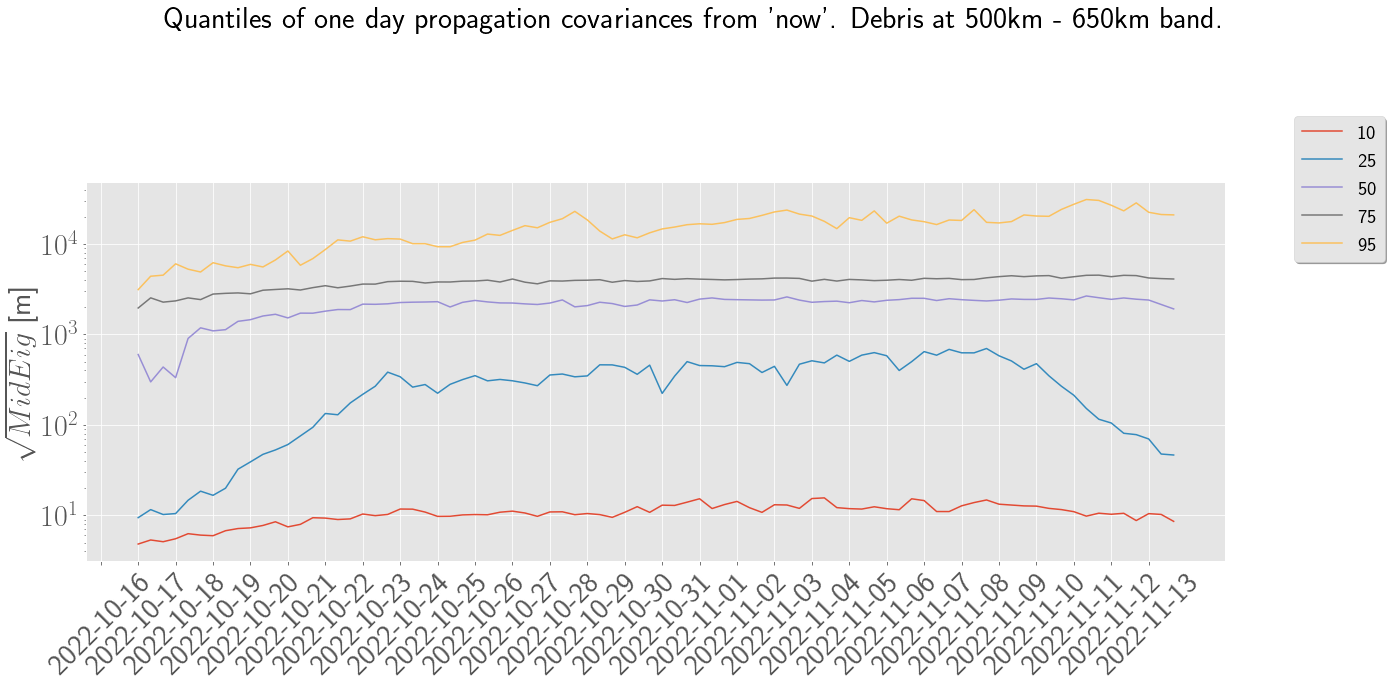

In [73]:
fig,(ax1) = plt.subplots(1,1,figsize=(20,10))

fig.suptitle("Quantiles of one day propagation covariances from 'now'. Debris at 500km - 650km band.")

ax1.plot(xs,np.sqrt(pre2d110),label="10")
ax1.plot(xs,np.sqrt(pre2d125),label="25")
ax1.plot(xs,np.sqrt(pre2d150),label="50")
ax1.plot(xs,np.sqrt(pre2d175),label="75")
ax1.plot(xs,np.sqrt(pre2d195),label="95")
ax1.set_yscale('log')
ax1.set_ylabel(r'$\sqrt{Mid Eig}$ [m]')

ax1.xaxis.set_ticks(x_t[0:-1:3])
ax1.xaxis.set_ticklabels(x_major_ticks_labels)
for tick in ax1.get_xticklabels():
    tick.set_rotation(45)
ax1.legend(loc='upper center', bbox_to_anchor=(1.1, 1.2),
          fancybox=True, shadow=True,prop={'size': 20})

plt.tight_layout()
plt.show()

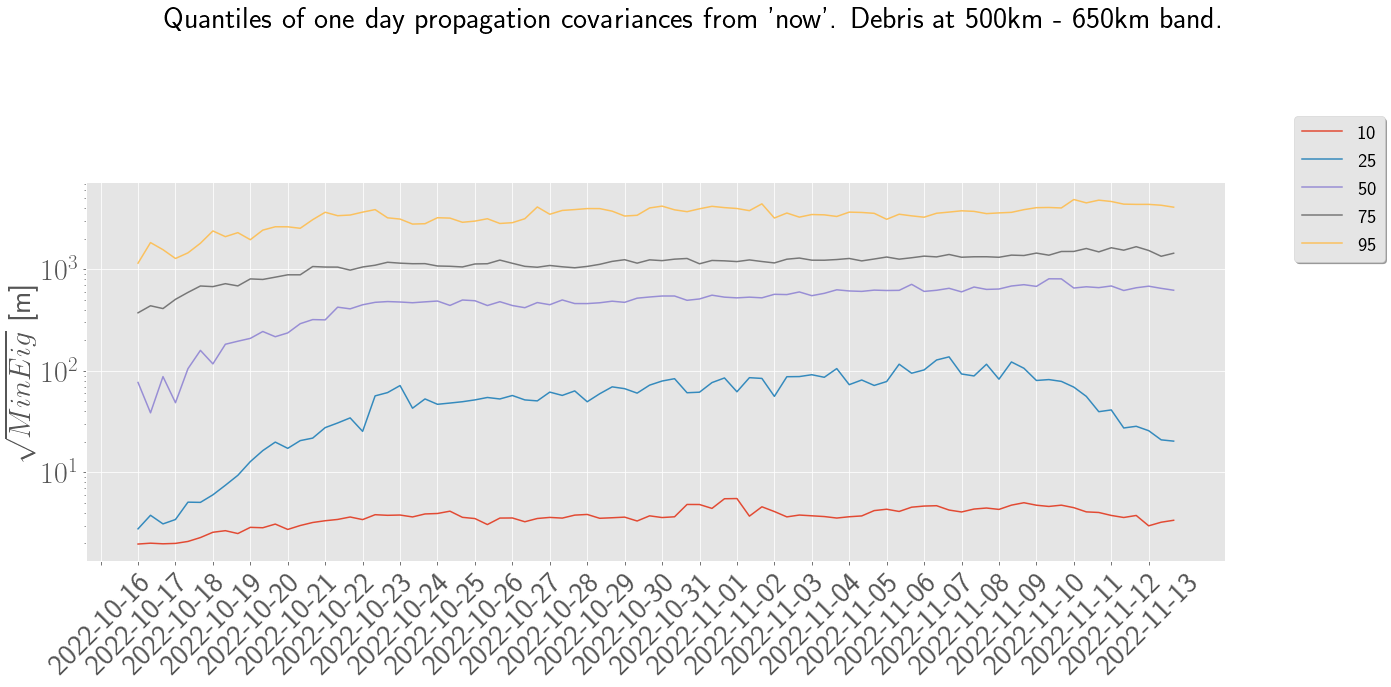

In [74]:
fig,(ax1) = plt.subplots(1,1,figsize=(20,10))

fig.suptitle("Quantiles of one day propagation covariances from 'now'. Debris at 500km - 650km band.")

ax1.plot(xs,np.sqrt(pre3d110),label="10")
ax1.plot(xs,np.sqrt(pre3d125),label="25")
ax1.plot(xs,np.sqrt(pre3d150),label="50")
ax1.plot(xs,np.sqrt(pre3d175),label="75")
ax1.plot(xs,np.sqrt(pre3d195),label="95")
ax1.set_yscale('log')
ax1.set_ylabel(r'$\sqrt{Min Eig}$ [m]')

ax1.xaxis.set_ticks(x_t[0:-1:3])
ax1.xaxis.set_ticklabels(x_major_ticks_labels)
for tick in ax1.get_xticklabels():
    tick.set_rotation(45)
ax1.legend(loc='upper center', bbox_to_anchor=(1.1, 1.2),
          fancybox=True, shadow=True,prop={'size': 20})

plt.tight_layout()
plt.show()

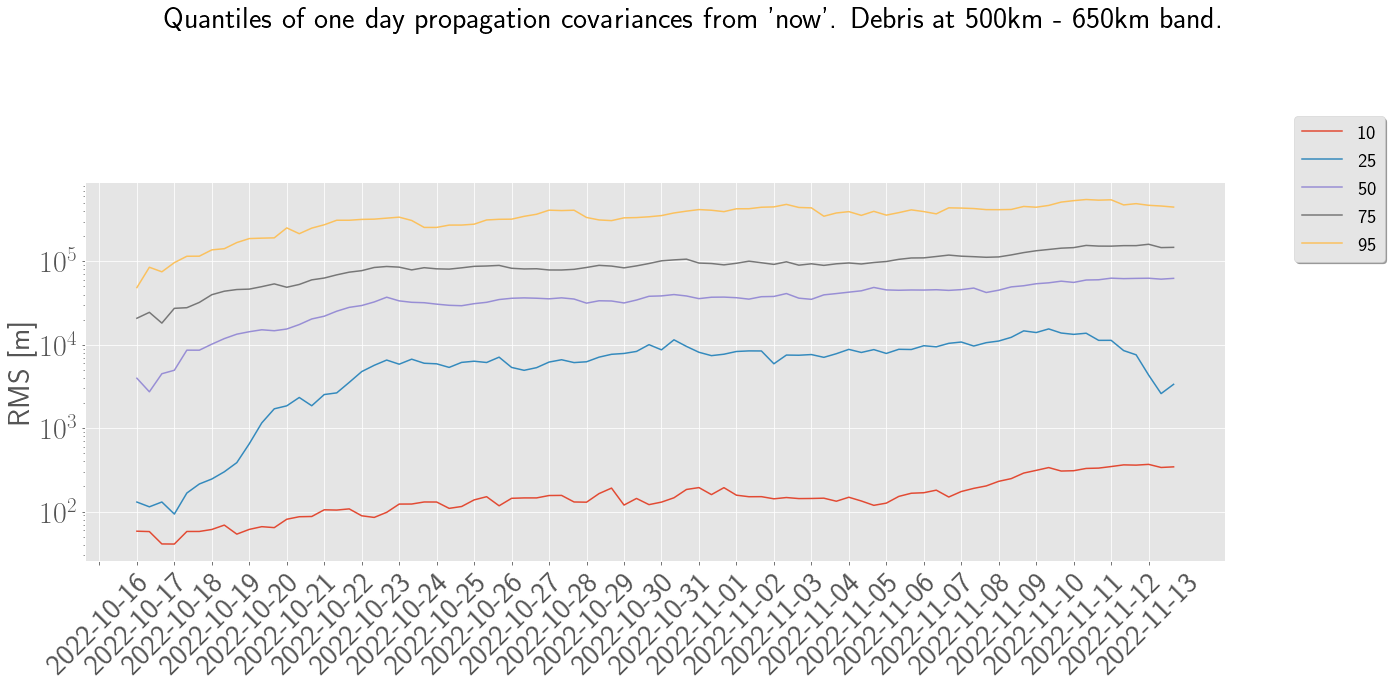

In [75]:
fig,(ax1) = plt.subplots(1,1,figsize=(20,10))

fig.suptitle("Quantiles of one day propagation covariances from 'now'. Debris at 500km - 650km band.")

ax1.plot(xs,prd1rms10,label="10")
ax1.plot(xs,prd1rms25,label="25")
ax1.plot(xs,prd1rms50,label="50")
ax1.plot(xs,prd1rms75,label="75")
ax1.plot(xs,prd1rms95,label="95")
ax1.set_yscale('log')
ax1.set_ylabel(r'RMS [m]')

ax1.xaxis.set_ticks(x_t[0:-1:3])
ax1.xaxis.set_ticklabels(x_major_ticks_labels)
for tick in ax1.get_xticklabels():
    tick.set_rotation(45)
ax1.legend(loc='upper center', bbox_to_anchor=(1.1, 1.2),
          fancybox=True, shadow=True,prop={'size': 20})

plt.tight_layout()
plt.show()

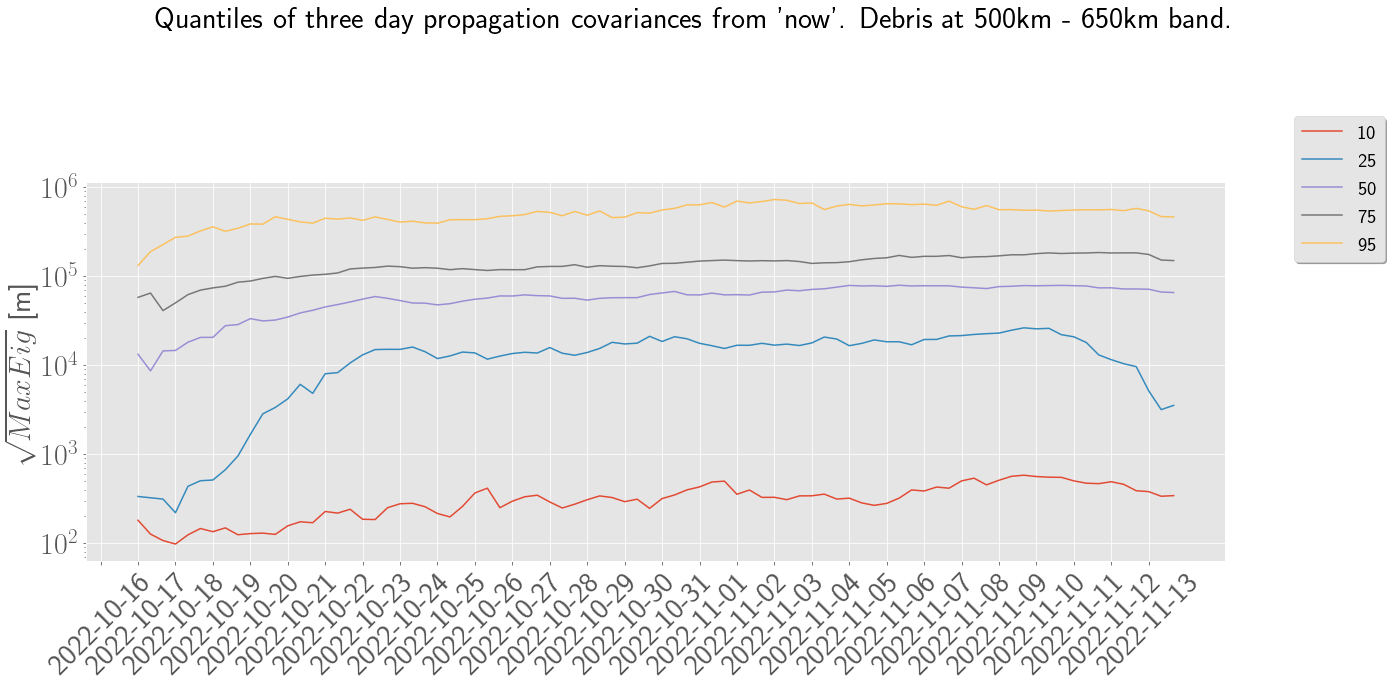

In [76]:
fig,(ax1) = plt.subplots(1,1,figsize=(20,10))

fig.suptitle("Quantiles of three day propagation covariances from 'now'. Debris at 500km - 650km band.")

ax1.plot(xs,np.sqrt(pre1d310),label="10")
ax1.plot(xs,np.sqrt(pre1d325),label="25")
ax1.plot(xs,np.sqrt(pre1d350),label="50")
ax1.plot(xs,np.sqrt(pre1d375),label="75")
ax1.plot(xs,np.sqrt(pre1d395),label="95")
ax1.set_yscale('log')
ax1.set_ylabel(r'$\sqrt{Max Eig}$ [m]')

ax1.xaxis.set_ticks(x_t[0:-1:3])
ax1.xaxis.set_ticklabels(x_major_ticks_labels)
for tick in ax1.get_xticklabels():
    tick.set_rotation(45)
ax1.legend(loc='upper center', bbox_to_anchor=(1.1, 1.2),
          fancybox=True, shadow=True,prop={'size': 20})

plt.tight_layout()
plt.show()

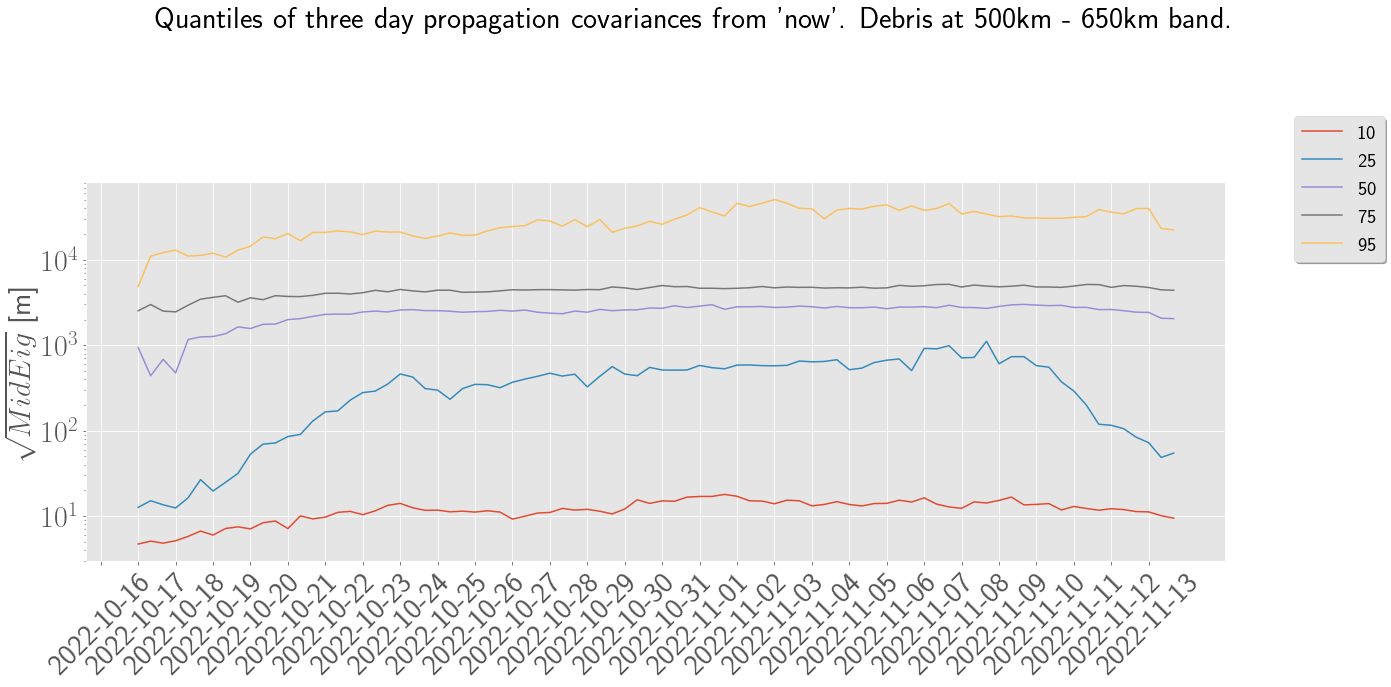

In [77]:
fig,(ax1) = plt.subplots(1,1,figsize=(20,10))

fig.suptitle("Quantiles of three day propagation covariances from 'now'. Debris at 500km - 650km band.")

ax1.plot(xs,np.sqrt(pre2d310),label="10")
ax1.plot(xs,np.sqrt(pre2d325),label="25")
ax1.plot(xs,np.sqrt(pre2d350),label="50")
ax1.plot(xs,np.sqrt(pre2d375),label="75")
ax1.plot(xs,np.sqrt(pre2d395),label="95")
ax1.set_yscale('log')
ax1.set_ylabel(r'$\sqrt{Mid Eig}$ [m]')

ax1.xaxis.set_ticks(x_t[0:-1:3])
ax1.xaxis.set_ticklabels(x_major_ticks_labels)
for tick in ax1.get_xticklabels():
    tick.set_rotation(45)
ax1.legend(loc='upper center', bbox_to_anchor=(1.1, 1.2),
          fancybox=True, shadow=True,prop={'size': 20})

plt.tight_layout()
plt.show()

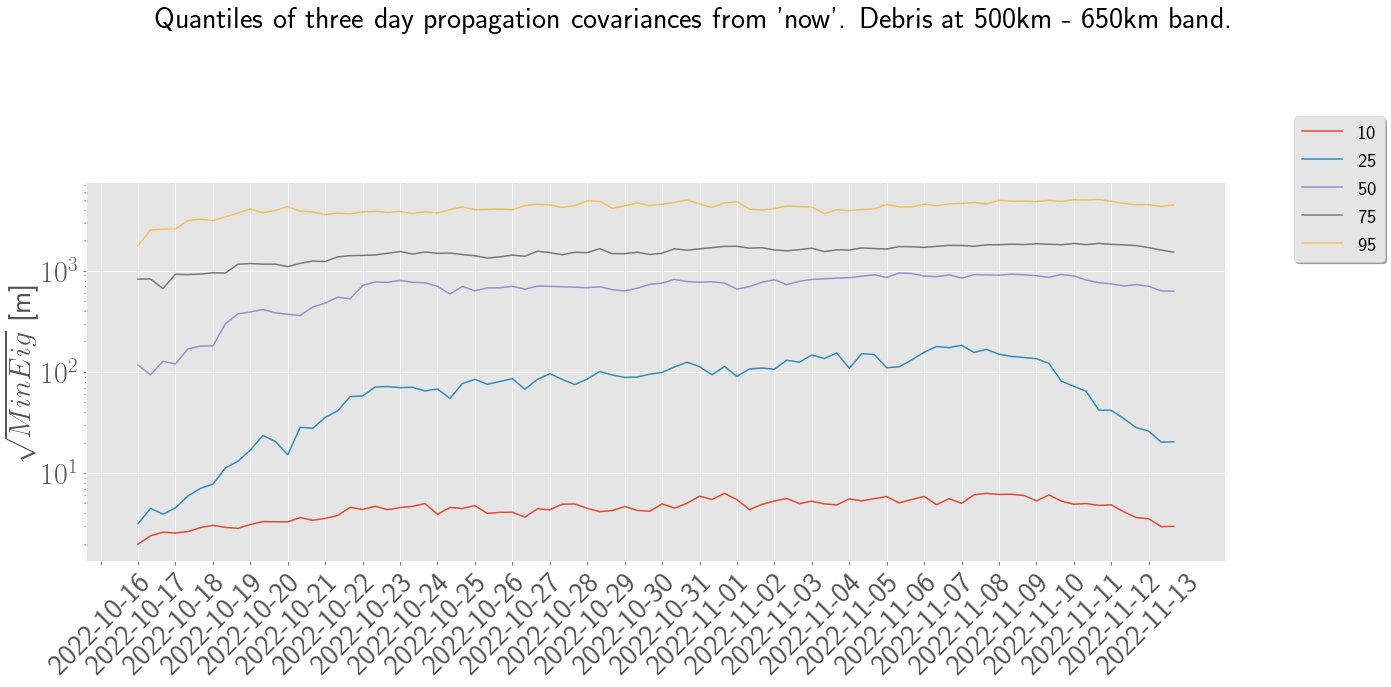

In [78]:
fig,(ax1) = plt.subplots(1,1,figsize=(20,10))

fig.suptitle("Quantiles of three day propagation covariances from 'now'. Debris at 500km - 650km band.")

ax1.plot(xs,np.sqrt(pre3d310),label="10")
ax1.plot(xs,np.sqrt(pre3d325),label="25")
ax1.plot(xs,np.sqrt(pre3d350),label="50")
ax1.plot(xs,np.sqrt(pre3d375),label="75")
ax1.plot(xs,np.sqrt(pre3d395),label="95")
ax1.set_yscale('log')
ax1.set_ylabel(r'$\sqrt{Min Eig}$ [m]')

ax1.xaxis.set_ticks(x_t[0:-1:3])
ax1.xaxis.set_ticklabels(x_major_ticks_labels)
for tick in ax1.get_xticklabels():
    tick.set_rotation(45)
ax1.legend(loc='upper center', bbox_to_anchor=(1.1, 1.2),
          fancybox=True, shadow=True,prop={'size': 20})

plt.tight_layout()
plt.show()

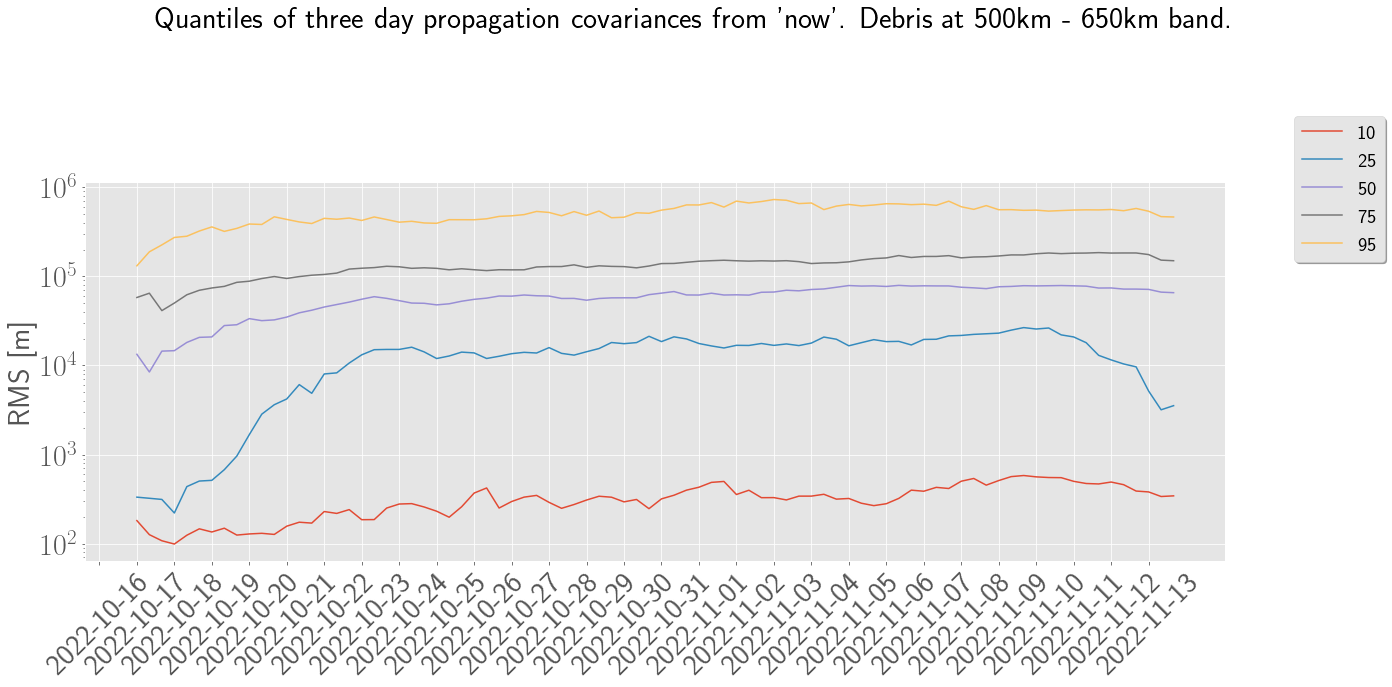

In [79]:
fig,(ax1) = plt.subplots(1,1,figsize=(20,10))

fig.suptitle("Quantiles of three day propagation covariances from 'now'. Debris at 500km - 650km band.")

ax1.plot(xs,prd3rms10,label="10")
ax1.plot(xs,prd3rms25,label="25")
ax1.plot(xs,prd3rms50,label="50")
ax1.plot(xs,prd3rms75,label="75")
ax1.plot(xs,prd3rms95,label="95")
ax1.set_yscale('log')
ax1.set_ylabel(r'RMS [m]')

ax1.xaxis.set_ticks(x_t[0:-1:3])
ax1.xaxis.set_ticklabels(x_major_ticks_labels)
for tick in ax1.get_xticklabels():
    tick.set_rotation(45)
ax1.legend(loc='upper center', bbox_to_anchor=(1.1, 1.2),
          fancybox=True, shadow=True,prop={'size': 20})

plt.tight_layout()
plt.show()